# FSL-VBM for Analysis of Correlation between GM density and Age

For this analysis we will use the datset data_Age. All of the steps from Tutorial 1 will be repeated for this dataset, but we will need a new design matrix and contrasts file. 

## Create the design matrix and contrasts files

For this analysis we will include one covariate of interest (Age) and one nuisance variable (sex), and therefore the design_ttest2 script will no longer be useful to create the design.mat and design.con files. Instead we will create these files by hand. Detailed instructions on how to do this can be found here:

https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM/CreatingDesignMatricesByHand

There are three steps involved:

1.	Enter the data for your design matrix, contrasts, or F-tests, using your data-editing tool of choice (e.g. Microsoft Excel, Google docs, Notepad). 

2.	Save your data as a plain text file, with columns separated by spaces or tabs - in Excel, saving your file as Text (Tab delimited) should do the trick. 

3.	Use the Text2Vest tool, to convert the data into the format used by FSL.

Steps 1 and 2 have already been performed for you, and you can find the text files together with the data you downloaded: design_Age.txt and contrasts_Age.txt. Thereefore all we have to do is set up and run the Text2Vest commands: 


In [3]:
#import general modules
import os
import subprocess

#set up paths
notebook_dir = "/home/cognestic/COGNESTIC/03_Structural_MRI/FSLVBM/notebooks"
data_dir = "/home/cognestic/COGNESTIC/03_Structural_MRI/FSLVBM/data"
vbm_dir = f"{data_dir}/data_Age/FSLVBM"

#set up the command to run Text2Vest to create the design matrix
command = f"Text2Vest {vbm_dir}/design_Age.txt {vbm_dir}/design.mat"

# Execute the command
try:
    result = subprocess.run(command, shell=True, check=True, text=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print("Design matrix created successfullly.")
except subprocess.CalledProcessError as e:
    print(f"An error occurred: {e}")
    print("Output:\n", e.stdout)
    print("Errors:\n", e.stderr)


#set up the command to run Text2Vest to create the contrasts file
command = f"Text2Vest {vbm_dir}/contrasts_Age.txt {vbm_dir}/design.con"

# Execute the command
try:
    result = subprocess.run(command, shell=True, check=True, text=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print("Contrasts file created successfullly.")
except subprocess.CalledProcessError as e:
    print(f"An error occurred: {e}")
    print("Output:\n", e.stdout)
    print("Errors:\n", e.stderr)

Design matrix created successfullly.
Contrasts file created successfullly.


If you look at the design.mat file you can see we have three explanatory variables: one for the group (all 1s because this time the data is being analysed as a single group), one for demeaned age, and one for gender (also demeaned). 


In [4]:
#Read the design matrix file

with open(f"{vbm_dir}/design.mat", 'r') as file:
    file_content = file.read()

print(file_content)   

/NumWaves 3
/NumPoints 34
/Matrix
1.000000000000 3.294117647000 1.000000000000
1.000000000000 21.294117650000 0.000000000000
1.000000000000 -29.705882350000 1.000000000000
1.000000000000 -21.705882350000 1.000000000000
1.000000000000 -33.705882350000 1.000000000000
1.000000000000 7.294117647000 1.000000000000
1.000000000000 -4.705882353000 1.000000000000
1.000000000000 17.294117650000 0.000000000000
1.000000000000 13.294117650000 0.000000000000
1.000000000000 5.294117647000 0.000000000000
1.000000000000 -17.705882350000 1.000000000000
1.000000000000 -12.705882350000 1.000000000000
1.000000000000 11.294117650000 1.000000000000
1.000000000000 33.294117650000 0.000000000000
1.000000000000 -8.705882353000 1.000000000000
1.000000000000 9.294117647000 0.000000000000
1.000000000000 19.294117650000 1.000000000000
1.000000000000 -10.705882350000 0.000000000000
1.000000000000 31.294117650000 1.000000000000
1.000000000000 -27.705882350000 0.000000000000
1.000000000000 27.294117650000 1.0000000000

And the contrast file looks like this:

In [5]:
#Read the design matrix file

with open(f"{vbm_dir}/design.con", 'r') as file:
    file_content = file.read()

print(file_content)   

/NumWaves 3
/NumPoints 3
/Matrix
1.000000000000 0.000000000000 0.000000000000
0.000000000000 1.000000000000 0.000000000000
0.000000000000 -1.000000000000 0.000000000000


Which means that after you run randomise this analysis will generate three satistical maps:

* tstat1: group mean
 
* tstat2: positive correlation with age

* tstat3: negative correlation with age


## Run FSL-VBM 

Now that we have the design matrix and contrasts files set up for our analysis, we can run the FSL-VBM steps described in Tutorial 1:

In [6]:
import glob

#select files to be included in the template and create the template list file

#list the T1 files in FSLVBM directory
T1_files = glob.glob(f"{vbm_dir}/*_MPRAGE.nii")

output_file = f"{vbm_dir}/template_list"

with open(output_file, "w") as file:
    for item in T1_files:
        file.write(f"{item[-20:]}\n")




### Check the data

In [7]:
#change to vbm directory
os.chdir(vbm_dir)

#check if a slicesdir folder exists within the fslvbm directory, which would suggest that the slicesdir command has been run
slicesdir_path = f"{vbm_dir}/slicesdir"

#if slicesdir has not been run, run it to inspect the FA data
if not os.path.exists(slicesdir_path):

    #run slicesdir to inspect the T1 data

    #set up the command
    command = "slicesdir *.nii"

    # Execute the command
    try:
        result = subprocess.run(command, shell=True, check=True, text=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        html_file = [f for f in os.listdir(f"{vbm_dir}/slicesdir") if f.endswith('.html')]
        print(f"slicesdir completed successfully. To visualise the output, open the following link in your browser: http://{vbm_dir}/slicesdir/{html_file[0]}")
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")
        print("Output:\n", e.stdout)
        print("Errors:\n", e.stderr)



### fslvbm_1_bet

In [9]:
#change to vbm directory
os.chdir(vbm_dir)

#check if a struct folder exists within the fslvbm directory, which would suggest that the fslvbm_1_bet command has been run
struc_path = f"{vbm_dir}/struc"

#if fslvbm_1_bet has not been run, run it now 
if not os.path.exists(struc_path):

    #run fslvbm_1_bet

    #set up the command
    command = "fslvbm_1_bet -N"

    # Execute the command
    try:
        result = subprocess.run(command, shell=True, check=True, text=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print('fslvbm_1_bet completed successfully.')
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")
        print("Output:\n", e.stdout)
        print("Errors:\n", e.stderr)



### tbss_2_template

In [11]:
#change to vbm directory
os.chdir(vbm_dir)

#check if the file template_GM.nii.gz exists within the fslvbm/struc directory, which would suggest that the fslvbm_2_template command has been run
template_path = f"{vbm_dir}/struc/template_GM.nii.gz"

#if tbss_2_template has not been run, run it now
if not os.path.exists(template_path):

    #run fslvbm_2_template

    #set up the command
    command = "fslvbm_2_template -n"

    # Execute the command
    try:
        result = subprocess.run(command, shell=True, check=True, text=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print('fslvbm_2_template completed successfully.')
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")
        print("Output:\n", e.stdout)
        print("Errors:\n", e.stderr)



### tbss_3_proc

In [12]:
#change to vbm directory
os.chdir(vbm_dir)

#check if the directory stats exists within the fslvbm directory, which would suggest that the fslvbm_3_proc command has been run
stats_path = f"{vbm_dir}/stats"

#if tbss_3_proc has not been run, run it now
if not os.path.exists(stats_path):

    #run fslvbm_3_proc

    #set up the command
    command = "fslvbm_3_proc"

    # Execute the command
    try:
        result = subprocess.run(command, shell=True, check=True, text=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print('fslvbm_3_proc completed successfully.')
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")
        print("Output:\n", e.stdout)
        print("Errors:\n", e.stderr)



### Statistical inference using randomise

In [14]:
#change into the stats directory
os.chdir(f"{vbm_dir}/stats")

#check if the fslvbm_tfce_corrp_tstat1.nii.gz file exists within the fslvbm/stats directory, which would suggest that the randomise step has been run 
corrp_file_path = f"{vbm_dir}/stats/fslvbm_age_tfce_corrp_tstat1.nii.gz"

#if the skeletonised data does not exist, run randomise
if not os.path.exists(corrp_file_path):

    #set up the command to run randomise with 500 permutations
    command = (
        f'randomise -i GM_mod_merg_s3 '
        f'-o fslvbm_age '
        f'-m GM_mask '
        f'-d design.mat '
        f'-t design.con '
        f'-n 500 '
        f'-T'  
    )

    # Execute the command
    try:
        result = subprocess.run(command, shell=True, check=True, text=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print('randomise completed successfully.')
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")
        print("Output:\n", e.stdout)
        print("Errors:\n", e.stderr)

randomise completed successfully.


## Visualise the results

When ranomise has finished you can look at the results. First, we will look at the brain regions showing a positive correlation with age:

/home/mc04/.conda/envs/fmri/lib/python3.10/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(
/home/mc04/.conda/envs/fmri/lib/python3.10/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


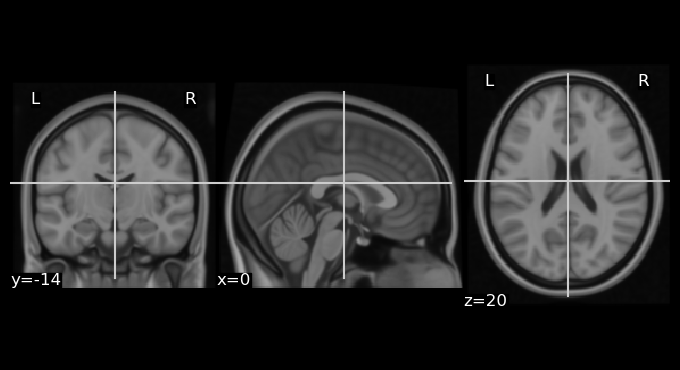

In [3]:
import numpy as np
from nilearn import image, plotting
import matplotlib.pyplot as plt

#path to FSLDIR
fsldir_path = os.environ.get('FSLDIR')

# Load the images
background_img = image.load_img(f"{fsldir_path}/data/standard/MNI152_T1_1mm.nii.gz")
overlay_img = image.load_img(f"{vbm_dir}/stats/fslvbm_age_tfce_corrp_tstat2.nii.gz")

#theshold the significance map to show only values between 0.95 and 1 to keep only significant voxels
data = overlay_img.get_fdata()
thresholded_data = np.where((data >= 0.95) & (data <= 1), data, 0)

# Create a new Nilearn image object with the thresholded data
thresholded_img = image.new_img_like(overlay_img, thresholded_data)

# Plotting the background image with the overlay
display = plotting.plot_anat(background_img, display_mode='ortho')
display.add_overlay(thresholded_img, cmap=plt.cm.hot, alpha=0.7)  # Using 'hot' colormap

# Show the plot
plt.show()

And the regions showing negative correlations with age are shown below:

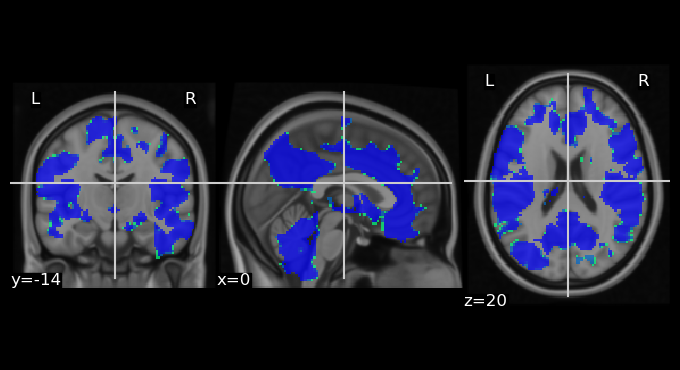

In [4]:
# Load the images
overlay_img = image.load_img(f"{vbm_dir}/stats/fslvbm_age_tfce_corrp_tstat3.nii.gz")

#theshold the significance map to show only values between 0.95 and 1 to keep only significant voxels
data = overlay_img.get_fdata()
thresholded_data = np.where((data >= 0.95) & (data <= 1), data, 0)

# Create a new Nilearn image object with the thresholded data
thresholded_img = image.new_img_like(overlay_img, thresholded_data)

# Plotting the background image with the overlay
display = plotting.plot_anat(background_img, display_mode='ortho')
display.add_overlay(thresholded_img, cmap=plt.cm.winter_r, alpha=0.7)  # Using 'winter' colormap

# Show the plot
plt.show()